# Support Vector Machine (SVM) and Kernel Functions

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import SVM model
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('leukemia.csv')

In [16]:
df.head()

,Patient_ID,1563591_at,1570350_at,200063_s_at,206289_at,206847_s_at,208129_x_at,208493_at,208557_at,208604_s_at,...,221691_x_at,221923_s_at,231786_at,235521_at,235753_at,237697_at,238571_at,238808_at,243058_at,Leukemia
0,Sample_1000,3.056436,3.618254,12.641006,5.062973,3.622257,5.536213,3.796584,4.578751,5.061145,...,11.077904,9.686451,2.980329,3.059078,3.780181,3.873638,3.631859,3.032457,5.186670,CLL
1,Sample_1001,2.972746,3.656448,13.009815,5.444977,4.430324,6.629713,4.143195,4.581042,4.815637,...,11.784089,11.272479,3.504151,4.614741,4.456387,3.392600,3.448984,3.547128,5.084203,AML
2,Sample_1002,3.111013,3.910347,12.271732,6.454073,6.612310,7.080542,4.685840,5.839468,5.313898,...,11.022868,10.209611,3.029066,8.911515,6.942798,3.864401,3.886512,3.015252,5.046901,AML
3,Sample_1003,2.882058,3.582897,12.784057,6.593272,4.799354,5.912197,3.515558,5.224020,5.401763,...,11.645520,10.333872,2.632752,7.398745,5.028869,3.845556,3.326164,2.811341,4.803970,AML
4,Sample_1004,3.335401,3.426485,12.671934,6.060153,6.832800,6.332313,3.391523,5.938946,5.526973,...,11.237164,10.486609,2.693749,8.503826,7.260643,3.547633,3.222044,2.904241,5.076562,AML


In [17]:
df['Leukemia'] = df['Leukemia'].apply(lambda x: 0 if x == 'Nonleukemia' else 1)


In [18]:
df.head()

,Patient_ID,1563591_at,1570350_at,200063_s_at,206289_at,206847_s_at,208129_x_at,208493_at,208557_at,208604_s_at,...,221691_x_at,221923_s_at,231786_at,235521_at,235753_at,237697_at,238571_at,238808_at,243058_at,Leukemia
0,Sample_1000,3.056436,3.618254,12.641006,5.062973,3.622257,5.536213,3.796584,4.578751,5.061145,...,11.077904,9.686451,2.980329,3.059078,3.780181,3.873638,3.631859,3.032457,5.186670,1
1,Sample_1001,2.972746,3.656448,13.009815,5.444977,4.430324,6.629713,4.143195,4.581042,4.815637,...,11.784089,11.272479,3.504151,4.614741,4.456387,3.392600,3.448984,3.547128,5.084203,1
2,Sample_1002,3.111013,3.910347,12.271732,6.454073,6.612310,7.080542,4.685840,5.839468,5.313898,...,11.022868,10.209611,3.029066,8.911515,6.942798,3.864401,3.886512,3.015252,5.046901,1
3,Sample_1003,2.882058,3.582897,12.784057,6.593272,4.799354,5.912197,3.515558,5.224020,5.401763,...,11.645520,10.333872,2.632752,7.398745,5.028869,3.845556,3.326164,2.811341,4.803970,1
4,Sample_1004,3.335401,3.426485,12.671934,6.060153,6.832800,6.332313,3.391523,5.938946,5.526973,...,11.237164,10.486609,2.693749,8.503826,7.260643,3.547633,3.222044,2.904241,5.076562,1


In [19]:
value_counts = df['Leukemia'].value_counts()

In [20]:
value_counts

1    1200
0      73
Name: Leukemia, dtype: int64

<AxesSubplot:>

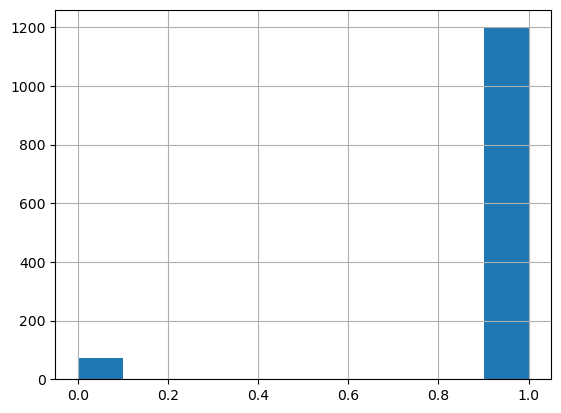

In [21]:
df['Leukemia'].hist()

In [22]:
df = df.drop('Patient_ID', axis=1)

In [23]:
df.head()

,1563591_at,1570350_at,200063_s_at,206289_at,206847_s_at,208129_x_at,208493_at,208557_at,208604_s_at,209359_x_at,...,221691_x_at,221923_s_at,231786_at,235521_at,235753_at,237697_at,238571_at,238808_at,243058_at,Leukemia
0,3.056436,3.618254,12.641006,5.062973,3.622257,5.536213,3.796584,4.578751,5.061145,5.290259,...,11.077904,9.686451,2.980329,3.059078,3.780181,3.873638,3.631859,3.032457,5.186670,1
1,2.972746,3.656448,13.009815,5.444977,4.430324,6.629713,4.143195,4.581042,4.815637,6.658555,...,11.784089,11.272479,3.504151,4.614741,4.456387,3.392600,3.448984,3.547128,5.084203,1
2,3.111013,3.910347,12.271732,6.454073,6.612310,7.080542,4.685840,5.839468,5.313898,6.910273,...,11.022868,10.209611,3.029066,8.911515,6.942798,3.864401,3.886512,3.015252,5.046901,1
3,2.882058,3.582897,12.784057,6.593272,4.799354,5.912197,3.515558,5.224020,5.401763,5.439815,...,11.645520,10.333872,2.632752,7.398745,5.028869,3.845556,3.326164,2.811341,4.803970,1
4,3.335401,3.426485,12.671934,6.060153,6.832800,6.332313,3.391523,5.938946,5.526973,6.680934,...,11.237164,10.486609,2.693749,8.503826,7.260643,3.547633,3.222044,2.904241,5.076562,1


In [24]:
x = df.drop('Leukemia', axis=1)
y = df['Leukemia']

In [25]:
# split the data
# test random state
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30)

In [26]:
# train and predict using a linear classifier
linear_clf = SVC(kernel='linear')
linear_clf.fit(xtrain, ytrain)
ypred1=linear_clf.predict(xtest)

In [27]:
# check model performance
from sklearn.metrics import accuracy_score
accuracy_score(ypred1, ytest)

0.9554973821989529

In [28]:
# train and predict using a RBF Kernel classifier
rbf_clf = SVC(kernel='rbf')
rbf_clf.fit(xtrain, ytrain)
ypred2=rbf_clf.predict(xtest)

In [29]:
# check model performance
from sklearn.metrics import accuracy_score
accuracy_score(ypred2, ytest)

0.9554973821989529

In [30]:
# train and predict using a poly kernel with degree 3
poly_clf = SVC(kernel='poly', degree=3)
poly_clf.fit(xtrain, ytrain)
ypred3=poly_clf.predict(xtest)

In [31]:
# train and predict using a poly kernel with degree 2
poly_clf = SVC(kernel='poly', degree=2)
poly_clf.fit(xtrain, ytrain)
ypred4=poly_clf.predict(xtest)

In [32]:
# check model performance
from sklearn.metrics import accuracy_score
accuracy_score(ypred3, ytest)

0.9633507853403142

In [33]:
# check model performance
from sklearn.metrics import accuracy_score
accuracy_score(ypred4, ytest)

0.9554973821989529